**The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**


**Acquiring the data**

**Importing packages & loading dataset.
We have acquired datasets from kaggle website & using it in this projects.**

In [99]:
import os
import pandas as pd # for data analytics
import numpy as np # for numerical computation

os.chdir('D:/courses_1st_sem/courses 2nd sem/python/project')

dataset1 = pd.read_csv('creditcard2.csv')
dataset = pd.read_csv('creditcard.csv')

(284807, 32)
Index(['ID', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


**Using join to merge two data subsets to have all the columns together**

In [ ]:
dataset = pd.merge(dataset,dataset1,on='ID')
print(dataset.shape)
print(dataset.columns)

**Calculating summary statistics of all variables: mean, std, min, 1st, 2nd, 3rd quartile, max**

In [100]:
dataset.describe()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142404.000000,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Visualising the distribution of variables**

In [101]:
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
import itertools
from pandas.plotting import scatter_matrix

style.use('ggplot')
np.random.seed(42)

**Plot 1**

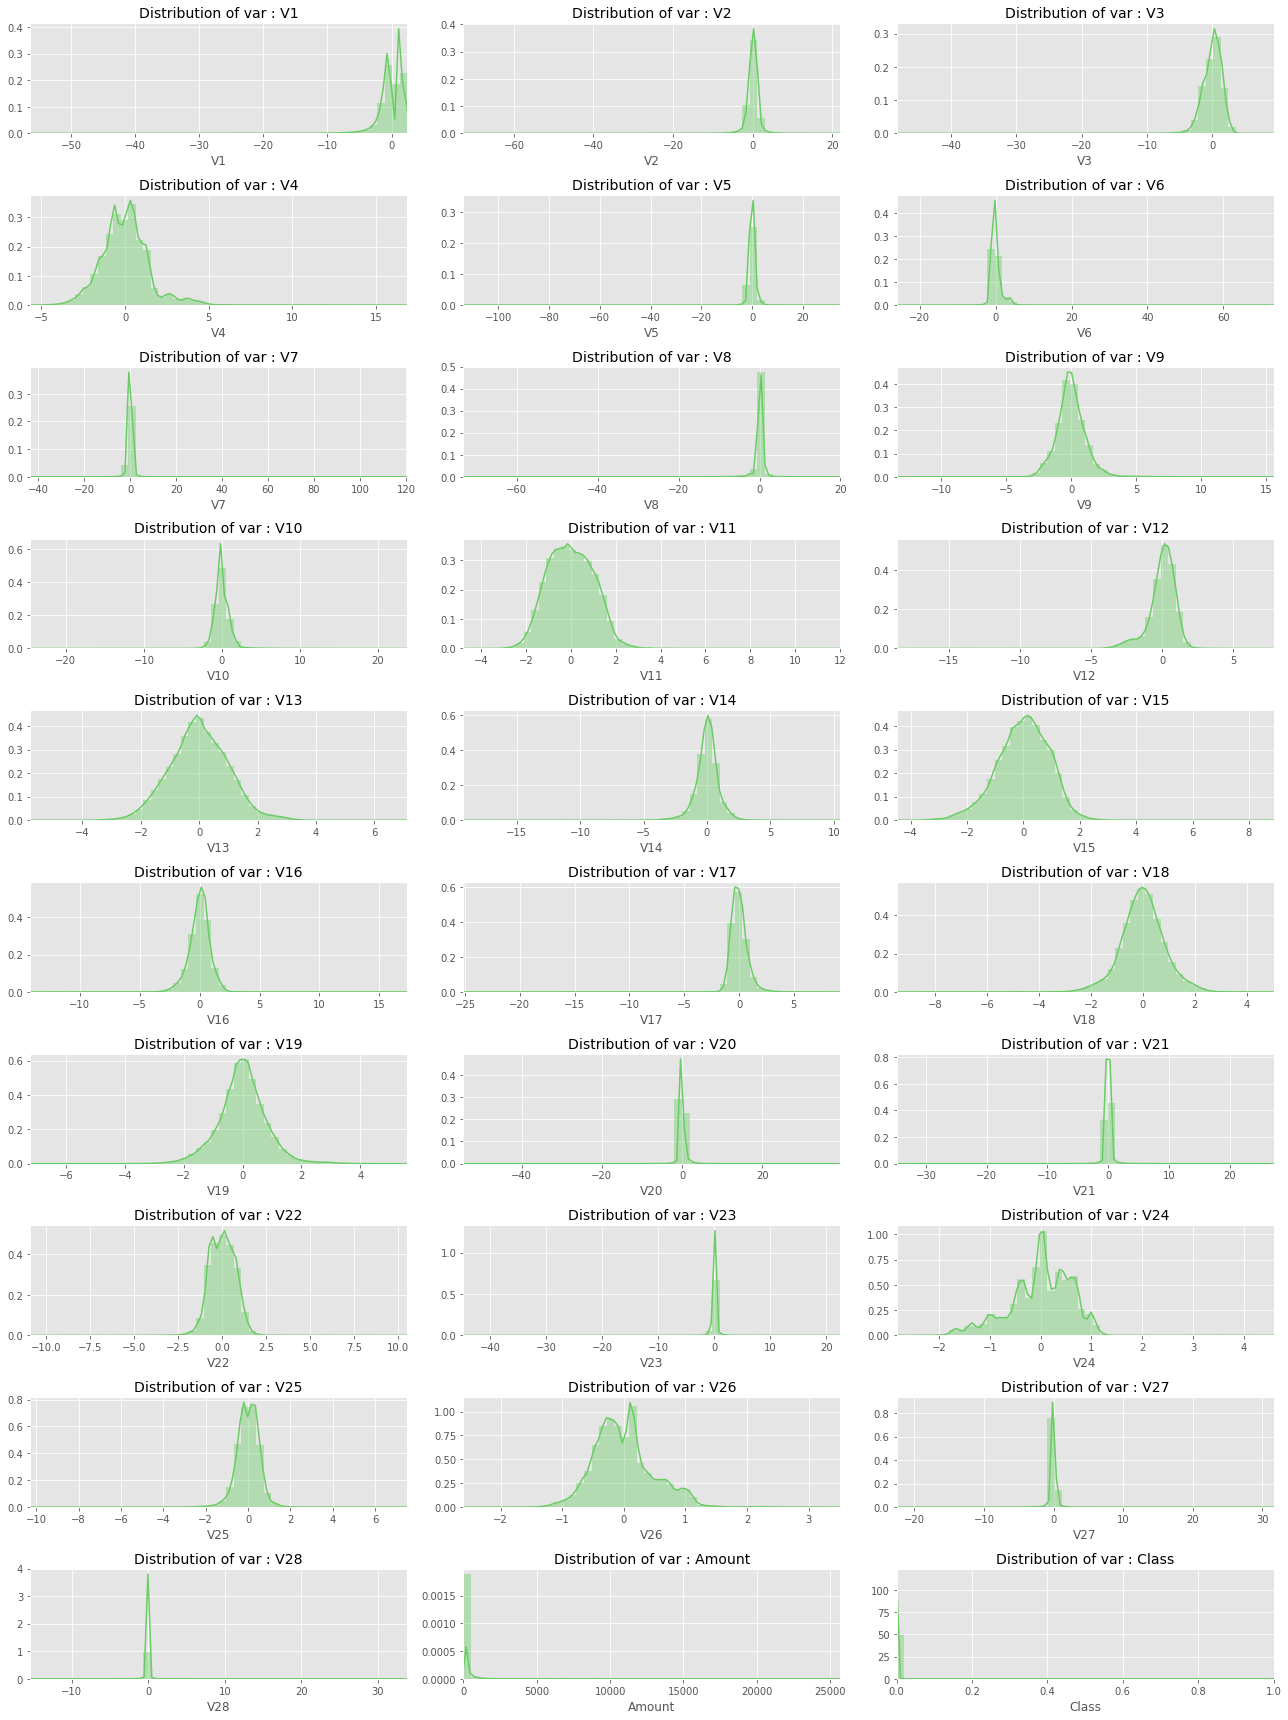

In [102]:
fig, ax = plt.subplots(((dataset.shape[1]-3) // 3+1), 3, figsize=(18,24))

columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

j=0
for i in range(30):
    var_name = columns[i]
    var_val = dataset[var_name]
    
        
    sns.distplot(var_val, ax=ax[i//3,j], color='g')
    ax[i//3,j].set_title('Distribution of var : ' + var_name, fontsize=14)
    ax[i//3,j].set_xlim([min(var_val), max(var_val)])
    plt.tight_layout()
    
    j+=1
    if j == 3:
        j=0


**Finding variables with highest positive & negative correlation with Class**

In [103]:
corr = pd.DataFrame(dataset.corr()['Class'])
corr_pos = corr[corr['Class']>=0]
corr_neg = corr[corr['Class']<0]
corr_neg.sort_values("Class", axis = 0, ascending = True, inplace = True, na_position ='last')
corr_pos.sort_values("Class", axis = 0, ascending = False, inplace = True, na_position ='last')

print(corr_neg[0:3])
print(corr_pos[1:4])

        Class
V17 -0.326481
V14 -0.302544
V12 -0.260593
        Class
V11  0.154876
V4   0.133447
V2   0.091289


**Plot 2**

**Visualizing most negatively correlated variables**

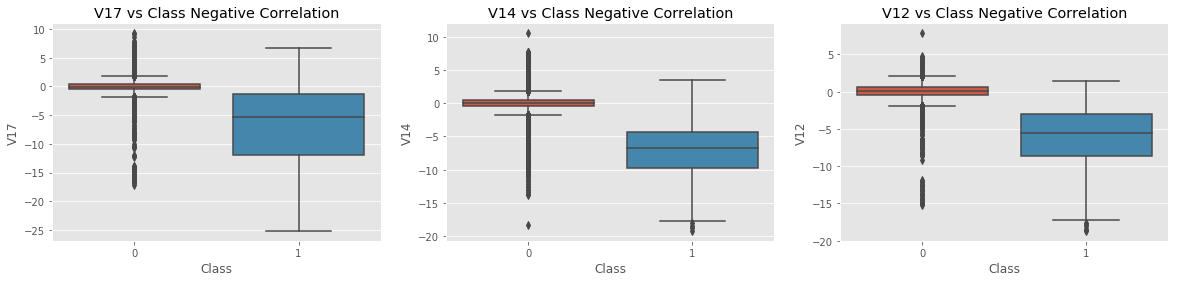

In [104]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y=str(corr_neg.index[0]), data=dataset, ax=axes[0])
axes[0].set_title(str(corr_neg.index[0]) + ' vs Class Negative Correlation')

sns.boxplot(x="Class", y=str(corr_neg.index[1]), data=dataset,  ax=axes[1])
axes[1].set_title(str(corr_neg.index[1]) + ' vs Class Negative Correlation')

sns.boxplot(x="Class", y=str(corr_neg.index[2]), data=dataset,  ax=axes[2])
axes[2].set_title(str(corr_neg.index[2]) + ' vs Class Negative Correlation')

plt.show()

**Plot 3**

**Visualizing most positively correlated variables**

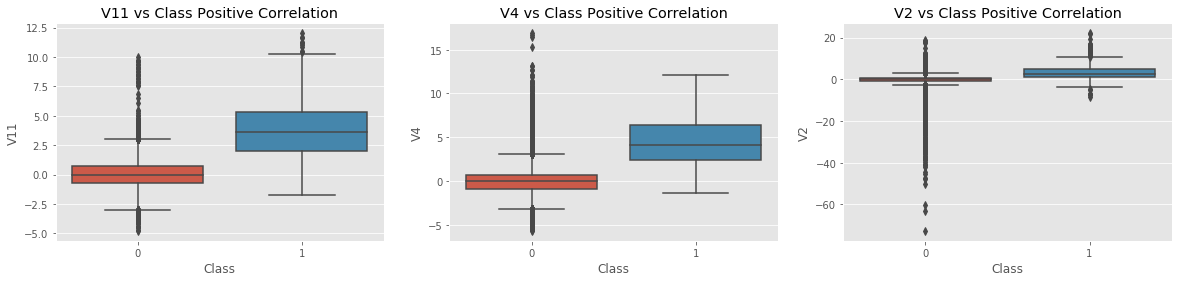

In [105]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive Correlations with our Class (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y=str(corr_pos.index[1]), data=dataset, ax=axes[0])
axes[0].set_title(str(corr_pos.index[1]) + ' vs Class Positive Correlation')

sns.boxplot(x="Class", y=str(corr_pos.index[2]), data=dataset,  ax=axes[1])
axes[1].set_title(str(corr_pos.index[2]) + ' vs Class Positive Correlation')

sns.boxplot(x="Class", y=str(corr_pos.index[3]), data=dataset,  ax=axes[2])
axes[2].set_title(str(corr_pos.index[3]) + ' vs Class Positive Correlation')

plt.show()

**Apply function**

**'Time' variable is the number of seconds elapsed between this transaction and the first transaction in the dataset. Let's create deciles of this variable & visualize if there is any trend of increase or decrease of fraud over time**

In [106]:
min_time = min(dataset['Time'])
max_time = max(dataset['Time'])
range_time = max_time-min_time

def time_deciles(time):
    if time < (min_time + 0.1*range_time):
        return '1st decile'
    elif time < (min_time + 0.2*range_time):
        return '2nd decile'
    elif time < (min_time + 0.3*range_time):
        return '3rd decile'
    elif time < (min_time + 0.4*range_time):
        return '4th decile'
    elif time < (min_time + 0.5*range_time):
        return '5th decile'
    elif time < (min_time + 0.6*range_time):
        return '6th decile'
    elif time < (min_time + 0.7*range_time):
        return '7th decile'
    elif time < (min_time + 0.8*range_time):
        return '8th decile'
    elif time < (min_time + 0.9*range_time):
        return '9th decile'
    else:
        return 'Last decile'

dataset['Time_deciles'] = dataset['Time'].apply(time_deciles)


**Using pivot to reshape the data**

**Visualizing the total amount of transactions in class 1 (fraud) & class 0 (non fraud) in different periods of time**

In [108]:
dataset.pivot_table(columns='Class',index='Time_deciles',values='Amount',aggfunc='sum')

Class,0,1
Time_deciles,,
1st decile,6.685320e+05,2900.66
2nd decile,1.438484e+06,5920.76
3rd decile,4.238022e+06,7215.95
4th decile,3.734520e+06,10763.38
5th decile,2.981108e+06,6438.36
6th decile,6.009021e+05,5729.19
7th decile,1.343087e+06,1199.32
8th decile,3.947497e+06,8362.53
9th decile,3.837846e+06,8798.06


**Groupby function**

**Visualizing the percentage of transactions in class 1 (fraud) average transaction amount in different periods of time**

In [109]:
dataset.groupby(['Time_deciles']).agg({'Class':['mean'], 'Amount':['sum']})

,Class,Amount
,mean,sum
Time_deciles,,
1st decile,0.003996,6.714326e+05
2nd decile,0.002831,1.444405e+06
3rd decile,0.002051,4.245238e+06
4th decile,0.001634,3.745284e+06
5th decile,0.001218,2.987546e+06
6th decile,0.006703,6.066313e+05
7th decile,0.000641,1.344286e+06
8th decile,0.000873,3.955859e+06


**Visualising mean of all independent variables for both classes**

In [110]:
dataset.groupby(['Class']).agg({'V1':'mean','V2':'mean','V3':'mean','V4':'mean','V5':'mean',
                                'V6':'mean','V7':'mean','V8':'mean','V9':'mean','V10':'mean',
                                'V11':'mean','V12':'mean','V13':'mean','V14':'mean'})

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
Class,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723


In [111]:
dataset.groupby(['Class']).agg({ 'V15':'mean',
                                'V16':'mean','V17':'mean','V18':'mean','V19':'mean','V20':'mean',
                                'V21':'mean','V22':'mean','V23':'mean','V24':'mean','V25':'mean',
                                'V26':'mean','V27':'mean','V28':'mean'})

,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Class,,,,,,,,,,,,,,
0,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131
1,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667


**Loading all required packages for machine learning & doing some data preprocessing**

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_std = pd.DataFrame(scaler.fit_transform(dataset.drop(['ID','Time_deciles'],axis=1)), columns = dataset.drop(['ID','Time_deciles'],axis=1).columns)

dataset_std.Class = (dataset.Class).astype('category')
df = dataset_std

from sklearn.metrics import accuracy_score,roc_auc_score, log_loss, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score,precision_recall_curve 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import itertools

style.use('ggplot')
np.random.seed(42)

**Splitting data into train & test set & checking whether fraction of class 1 is similar in both train & test data**

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(df,df['Class'],test_size = 0.3,random_state=100,shuffle = True)

print(round((y_train.value_counts()[1]/X_train.shape[0]),4))
print(round((y_test.value_counts()[1]/X_test.shape[0]),4))

0.0018
0.0017


**Trying following 3 linear models: Logistic regression, LDA & SVM with linear kernel**

In [125]:
classifiers = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    SVC(kernel="linear", C=0.25, probability=True)
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "train_3fold_CV_auc","test_auc"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    auc_scores = cross_val_score(clf,X_train,y_train,cv=3,scoring=make_scorer(roc_auc_score))
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    model = clf.fit(X_train,y_train)
    test_prob = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, test_prob[:,1])
    
    log_entry = pd.DataFrame([[name, auc_scores.mean(),test_auc]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
LinearDiscriminantAnalysis
SVC


**Plot 4**

**Visualizing AUC scores of linear models after 3-fold cross validation on train data**

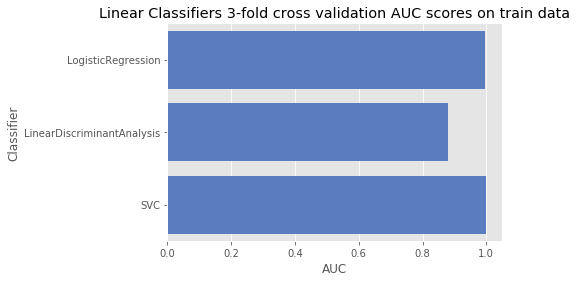

In [130]:
sns.set_color_codes("muted")
sns.barplot(x="train_3fold_CV_auc", y="Classifier", data=log, color="b")

plt.xlabel('AUC')
plt.title('Linear Classifiers 3-fold cross validation AUC scores on train data')
plt.show()

**Plot 5**

**Visualizing AUC scores of linear models on test data**

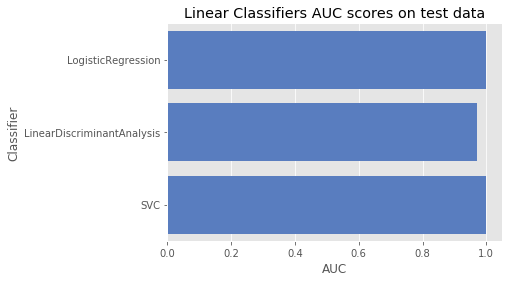

In [131]:
sns.set_color_codes("muted")
sns.barplot(x="test_auc", y="Classifier", data=log, color="b")

plt.xlabel('AUC')
plt.title('Linear Classifiers AUC scores on test data')
plt.show()

**Both Logistic regression & SVC gave ~100% AUC score on test data**

**Trying following 3 non-linear models: KNN, decision tree & QDA**

In [132]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    QuadraticDiscriminantAnalysis()
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "train_3fold_CV_auc","test_auc"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    auc_scores = cross_val_score(clf,X_train,y_train,cv=3,scoring=make_scorer(roc_auc_score))
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    model = clf.fit(X_train,y_train)
    test_prob = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, test_prob[:,1])
    
    log_entry = pd.DataFrame([[name, auc_scores.mean(),test_auc]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
DecisionTreeClassifier
QuadraticDiscriminantAnalysis


**Plot 6**

**Visualizing AUC scores of non-linear models after 3-fold cross validation on train data**

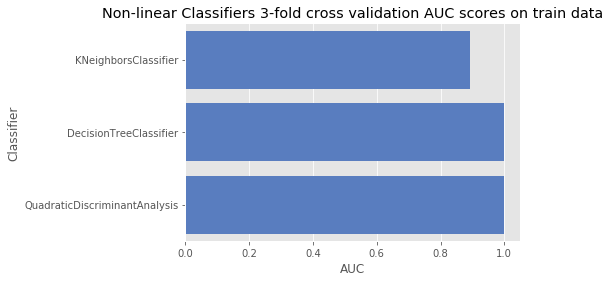

In [134]:
sns.set_color_codes("muted")
sns.barplot(x="train_3fold_CV_auc", y="Classifier", data=log, color="b")

plt.xlabel('AUC')
plt.title('Non-linear Classifiers 3-fold cross validation AUC scores on train data')
plt.show()

**Plot 7**

**Visualizing AUC scores of non-linear models on test data**

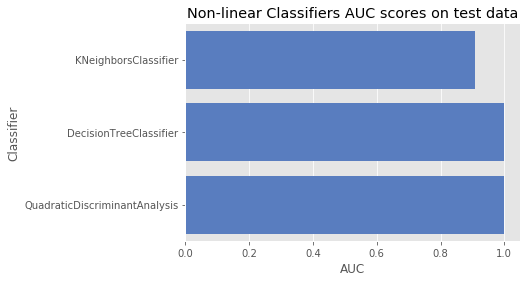

In [135]:
sns.set_color_codes("muted")
sns.barplot(x="test_auc", y="Classifier", data=log, color="b")

plt.xlabel('AUC')
plt.title('Non-linear Classifiers AUC scores on test data')
plt.show()

**Both Decision Tree & QDA gave ~100% AUC score on test data**

**Neural network model using Keras. We are using a smaller sample to pace-up the calculations, due to limited RAM available**

In [136]:
#Splitting data into train & test set & checking whether fraction of class 1 is similar in both train & test data
X_subset, _, y_subset,  _ = train_test_split(df,df['Class'],test_size = 0.9,random_state=100,shuffle = True)
X_train, X_test, y_train,  y_test = train_test_split(X_subset,y_subset,test_size = 0.3,random_state=100,shuffle = True)
print(round((y_train.value_counts()[1]/X_train.shape[0]),4))
print(round((y_test.value_counts()[1]/X_test.shape[0]),4))

0.0015
0.002


In [137]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=100)

# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))


# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/10
19936/19936 [==============================] - 1s 45us/step - loss: 0.5045 - accuracy: 0.8157
Epoch 2/10
19936/19936 [==============================] - 0s 23us/step - loss: 0.0876 - accuracy: 0.9988
Epoch 3/10
19936/19936 [==============================] - 0s 25us/step - loss: 0.0242 - accuracy: 0.9989
Epoch 4/10
19936/19936 [==============================] - 0s 23us/step - loss: 0.0122 - accuracy: 0.9992
Epoch 5/10
19936/19936 [==============================] - 0s 25us/step - loss: 0.0076 - accuracy: 0.9994
Epoch 6/10
19936/19936 [==============================] - 0s 24us/step - loss: 0.0058 - accuracy: 0.9994
Epoch 7/10
19936/19936 [==============================] - 0s 25us/step - loss: 0.0049 - accuracy: 0.9994
Epoch 8/10
19936/19936 [==============================] - 0s 24us/step - loss: 0.0043 - accuracy: 0.9994
Epoch 9/10
19936/19936 [==============================] - 1s 28us/step - loss: 0.0038 - accuracy: 0.9994
Epoch 10/10
19936/19936 [==============================

**Neural network gave ~100% results on test data**